# K-Means

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Load the Data

In [2]:
df = pd.read_csv("../datasets/data.csv")
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Plot some data

Text(0, 0.5, 'Income')

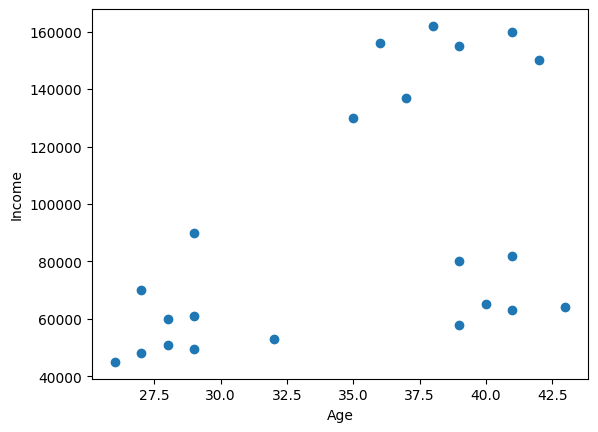

In [3]:
plt.scatter(df["Age"], df["Income"])
plt.xlabel("Age")
plt.ylabel("Income")

# Pairplot

c:\Python\Python31172\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Python\Python31172\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


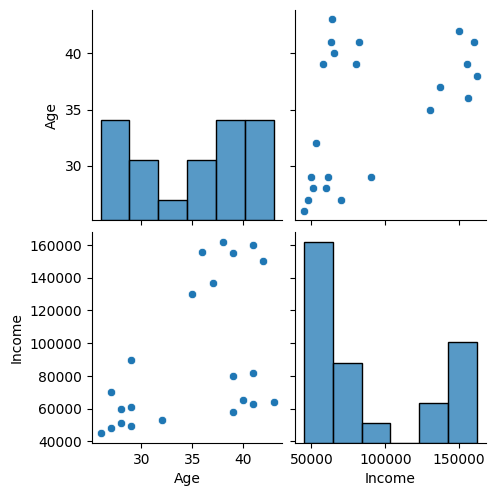

In [4]:
sn.pairplot(df)

# Build and train the model

In [5]:
# Create the instance
model = KMeans(n_clusters= 3)

# Train the model (fit) and assign the clusters to rows(predict)

y_predicted = model.fit_predict(df[["Age", "Income"]])

y_predicted



array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [6]:
df["cluster"] = y_predicted

df.sort_values("cluster", inplace= True)

df.head(10)

,Name,Age,Income,cluster
0,Rob,27,70000,0
18,Nick,43,64000,0
17,Priyanka,41,63000,0
16,Dipika,40,65000,0
15,Ranbir,32,53000,0
14,Stark,29,49500,0
13,Jared,28,51000,0
12,Arnold,27,48000,0
11,Tom,26,45000,0
21,Abdul,39,58000,0


# Centriods

In [7]:
model.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

# Inertia

In [8]:
model.inertia_

1606229737.6785715

# SPlit the clusters into 3x different df

In [9]:
df1 = df.loc[df.cluster == 0]
df2 = df.loc[df.cluster == 1]
df3 = df.loc[df.cluster == 2]

# Plot the clusters

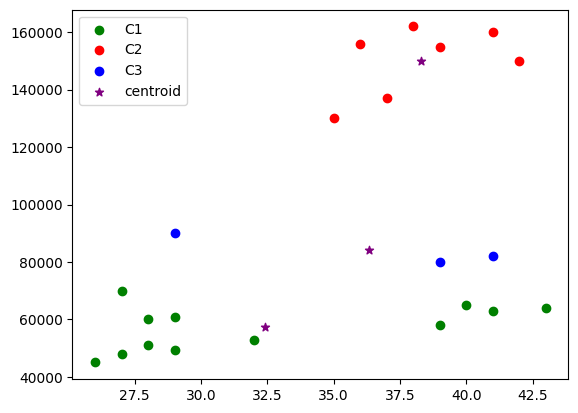

In [10]:
plt.scatter(df1["Age"], df1["Income"], color = "green", label = "C1")
plt.scatter(df2["Age"], df2["Income"], color = "red", label = "C2")
plt.scatter(df3["Age"], df3["Income"], color = "blue", label = "C3")


plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],
            color = "purple",
            marker = "*",
            label = "centroid"
            
            )

plt.legend()

# Normalizaion of the data

scale the data range to 0-1

In [13]:
# create the scaler

scaler = MinMaxScaler(feature_range=(0,1))

# Scale the age
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])


# Scale the income
scaler.fit(df[["Income"]])
df["Income"] = scaler.transform(df[["Income"]])




df.head(25)

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
18,Nick,1.000000,0.162393,0
17,Priyanka,0.882353,0.153846,0
16,Dipika,0.823529,0.170940,0
15,Ranbir,0.352941,0.068376,0
14,Stark,0.176471,0.038462,0
13,Jared,0.117647,0.051282,0
12,Arnold,0.058824,0.025641,0
11,Tom,0.000000,0.000000,0
21,Abdul,0.764706,0.111111,0


# Retrain the model using the normalized data

In [14]:
# Create the instance
model = KMeans(n_clusters= 3)

# Train the model (fit) and assign the clusters to rows(predict)

y_predicted = model.fit_predict(df[["Age", "Income"]])

# Attach the cluster column to df 
df["cluster"] = y_predicted 

df.sort_values("cluster", inplace= True)

df.head(10)


,Name,Age,Income,cluster
10,Donald,0.647059,0.786325,0
9,Angelina,0.529412,0.726496,0
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
0,Rob,0.058824,0.213675,1
2,Mohan,0.176471,0.136752,1
1,Michael,0.176471,0.384615,1


In [15]:
df1 = df.loc[df.cluster == 0]
df2 = df.loc[df.cluster == 1]
df3 = df.loc[df.cluster == 2]

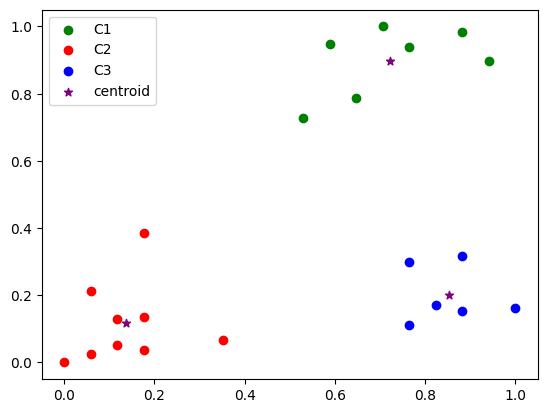

In [16]:
plt.scatter(df1["Age"], df1["Income"], color = "green", label = "C1")
plt.scatter(df2["Age"], df2["Income"], color = "red", label = "C2")
plt.scatter(df3["Age"], df3["Income"], color = "blue", label = "C3")


plt.scatter(model.cluster_centers_[:,0],
            model.cluster_centers_[:,1],
            color = "purple",
            marker = "*",
            label = "centroid"
            
            )

plt.legend()

In [17]:
model.inertia_

0.4750783498553094

# 1. Methode: Elbow

In [18]:
list_of_inertia_sse = []


k_range = range(2, 10)

for k in k_range:

    model = KMeans(n_clusters= k)

    model.fit(df[["Age", "Income"]])

    list_of_inertia_sse.append(model.inertia_)



Text(0, 0.5, 'Error')

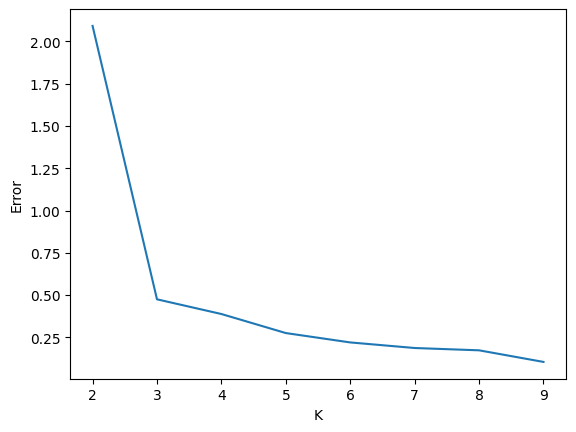

In [19]:
plt.plot(k_range, list_of_inertia_sse)
plt.xlabel("K")
plt.ylabel("Error")

# 2. Method: Silhouete Score

- (+1) Best - (0) Boundry - (-1) Worst

In [21]:
list_of_silhouette_score = []

k_range = range(2,10)


for k in k_range:

    model = KMeans(n_clusters=k)

    model.fit(df[["Age", "Income"]])

    s_score = silhouette_score(df[["Age", "Income"]], model.labels_)

    list_of_silhouette_score.append(s_score)

Text(0, 0.5, 's_score')

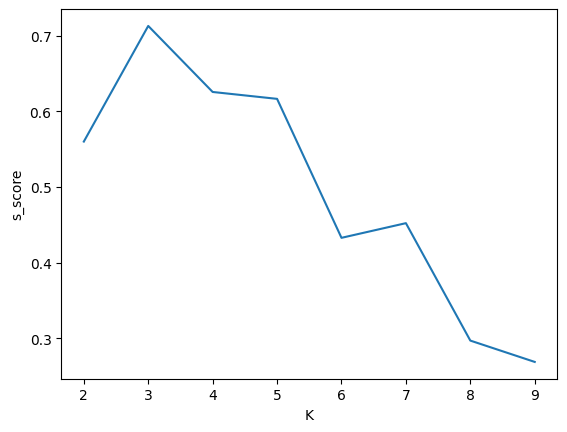

In [22]:
plt.plot(k_range, list_of_silhouette_score)
plt.xlabel("K")
plt.ylabel("s_score")